In [3]:
import os
import cv2
from PIL import Image, ImageEnhance
import numpy as np

def enhance_image(image_path, output_path):
    # Abrir la imagen usando PIL
    image = Image.open(image_path)

    # Mejora de nitidez
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(2.0)  # Ajusta este valor para cambiar la nitidez

    # Mejora de contraste
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.5)  # Ajusta este valor para cambiar el contraste

    # Mejora de color
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(1.2)  # Ajusta este valor para cambiar la saturación

    # Convertir imagen a array de OpenCV para la mejora de resolución
    image_cv = np.array(image)
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)  # Convertir a BGR para OpenCV

    # Aumentar la resolución usando la interpolación bicúbica
    scale_percent = 150  # Aumentar el tamaño en un 150%
    width = int(image_cv.shape[1] * scale_percent / 100)
    height = int(image_cv.shape[0] * scale_percent / 100)
    dim = (width, height)

    # Redimensionar la imagen
    image_cv = cv2.resize(image_cv, dim, interpolation=cv2.INTER_CUBIC)

    # Convertir de vuelta a RGB para PIL y guardar la imagen mejorada
    image_enhanced = Image.fromarray(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    image_enhanced.save(output_path)

if __name__ == "__main__":
    input_folder = r'C:\Users\paoli\OneDrive\Documentos\Trabajo_Grado\1'
    output_folder = r'C:\Users\paoli\OneDrive\Documentos\Trabajo_Grado\Imagenes_mejoradas'

    # Asegúrate de que la carpeta de salida exista
    os.makedirs(output_folder, exist_ok=True)

    # Iterar sobre todos los archivos en la carpeta de entrada
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filtra solo archivos de imagen
            input_image = os.path.join(input_folder, filename)
            
            # Genera la ruta de salida con el nombre de archivo adecuado
            output_image = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_enhanced.jpg")
            
            # Llama a la función de mejora de imagen
            enhance_image(input_image, output_image)

            print(f"La imagen mejorada se ha guardado en: {output_image}")



ModuleNotFoundError: No module named 'PIL'

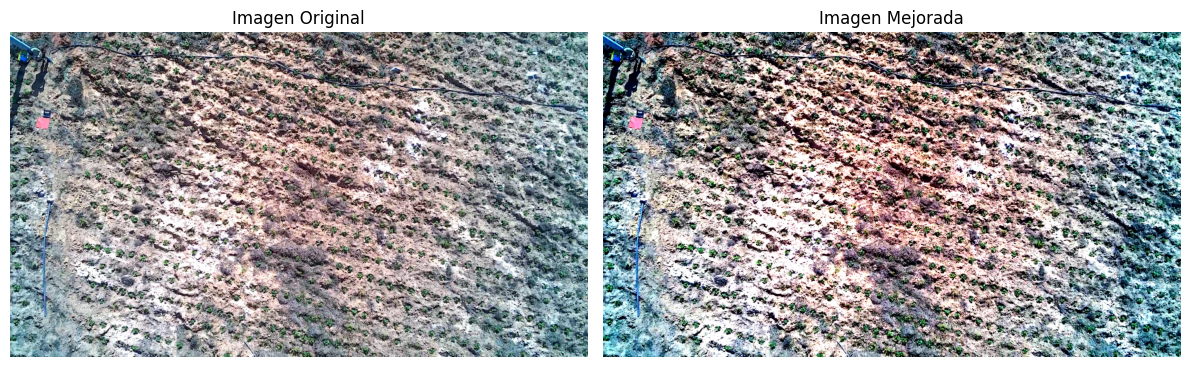

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def display_before_after(original_path, enhanced_path):
    # Cargar las imágenes
    original_image = Image.open(original_path)
    enhanced_image = Image.open(enhanced_path)

    # Crear una figura con dos subgráficos para mostrar las imágenes lado a lado
    plt.figure(figsize=(12, 6))

    # Mostrar la imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Imagen Original')
    plt.axis('off')

    # Mostrar la imagen mejorada
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image)
    plt.title('Imagen Mejorada')
    plt.axis('off')

    # Ajustar el espaciado y mostrar las imágenes
    plt.tight_layout()
    plt.show()

# Suponiendo que 'image_pairs' ya existe con los pares de rutas de imágenes originales y mejoradas
if 'image_pairs' in locals() and image_pairs:
    # Selecciona al azar un par de imágenes originales y mejoradas para mostrar
    random_pair = random.choice(image_pairs)
    display_before_after(*random_pair)
else:
    print("No se encontraron pares de imágenes para mostrar.")
